In [57]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline


In [58]:
# grab data set from url *multipul updates each day make sure we are on current tab....

cv_data = pd.read_html('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?usp=sharing&sle=true#')

In [59]:
#combine all tabs from data set
cv_data =pd.concat(cv_data)
cv_data

/Users/jordanpatton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D,E,F,G,H,I,Unnamed: 0
0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,NaN,NaN,NaN,1
1,Hubei,Mainland China,2/6/20 23:23,22112,618,817,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/6/20 12:43,970,0,69,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/6/20 10:53,954,0,94,NaN,NaN,NaN,4
4,Henan,Mainland China,2/6/20 11:23,851,2,56,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [60]:

#remove Strings from 1st row
cv_data.drop([0], inplace=True)
cv_data

,A,B,C,D,E,F,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/6/20 23:23,22112,618,817,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/6/20 12:43,970,0,69,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/6/20 10:53,954,0,94,NaN,NaN,NaN,4
4,Henan,Mainland China,2/6/20 11:23,851,2,56,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/6/20 13:13,711,0,81,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...
23,Heilongjiang,China,1/21/2020,NaN,1,NaN,NaN,NaN,NaN,24
24,NaN,Japan,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,25
25,NaN,Thailand,1/21/2020,2,NaN,NaN,NaN,NaN,NaN,26
26,NaN,South Korea,1/21/2020,1,NaN,NaN,NaN,NaN,NaN,27


In [61]:
#drop "Unnamed:0"

#cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=True)

#cv_data

#rename columns in dataframe

cv_data = cv_data.rename(columns={
    'A':'Province/State',
    'B':'Country/Region',
    'C':'Last_Update',
    'D':'Infected',
    'E':'Deaths',
    'F':'Recovered',
    
})

In [62]:
cv_data.head()

,Province/State,Country/Region,Last_Update,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
1,Hubei,Mainland China,2/6/20 23:23,22112,618,817,NaN,NaN,NaN,2
2,Guangdong,Mainland China,2/6/20 12:43,970,0,69,NaN,NaN,NaN,3
3,Zhejiang,Mainland China,2/6/20 10:53,954,0,94,NaN,NaN,NaN,4
4,Henan,Mainland China,2/6/20 11:23,851,2,56,NaN,NaN,NaN,5
5,Hunan,Mainland China,2/6/20 13:13,711,0,81,NaN,NaN,NaN,6


In [63]:
#set index

cv_data =cv_data.set_index('Last_Update')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered,G,H,I,Unnamed: 0
Last_Update,,,,,,,,,
2/6/20 23:23,Hubei,Mainland China,22112,618,817,NaN,NaN,NaN,2
2/6/20 12:43,Guangdong,Mainland China,970,0,69,NaN,NaN,NaN,3
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,NaN,NaN,NaN,4
2/6/20 11:23,Henan,Mainland China,851,2,56,NaN,NaN,NaN,5
2/6/20 13:13,Hunan,Mainland China,711,0,81,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN,NaN,NaN,NaN,24
1/21/2020,NaN,Japan,1,NaN,NaN,NaN,NaN,NaN,25
1/21/2020,NaN,Thailand,2,NaN,NaN,NaN,NaN,NaN,26


In [8]:
#drop "Unnamed:0"

cv_data =cv_data.drop(columns=['Unnamed: 0','G','H','I'], inplace=False)




In [9]:
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 12:33,Hubei,Mainland China,19665,549,712
2/6/20 12:43,Guangdong,Mainland China,970,0,69
2/6/20 10:53,Zhejiang,Mainland China,954,0,94
2/6/20 11:23,Henan,Mainland China,851,2,56
2/6/20 13:13,Hunan,Mainland China,711,0,81
...,...,...,...,...,...
1/21/2020,Heilongjiang,China,NaN,1,NaN
1/21/2020,NaN,Japan,1,NaN,NaN
1/21/2020,NaN,Thailand,2,NaN,NaN


In [10]:
cv_data.isnull()

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 12:33,False,False,False,False,False
2/6/20 12:43,False,False,False,False,False
2/6/20 10:53,False,False,False,False,False
2/6/20 11:23,False,False,False,False,False
2/6/20 13:13,False,False,False,False,False
...,...,...,...,...,...
1/21/2020,False,False,True,False,True
1/21/2020,True,False,False,True,True
1/21/2020,True,False,False,True,True


In [11]:
cv_data.dropna(inplace=True)
cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 12:33,Hubei,Mainland China,19665,549,712
2/6/20 12:43,Guangdong,Mainland China,970,0,69
2/6/20 10:53,Zhejiang,Mainland China,954,0,94
2/6/20 11:23,Henan,Mainland China,851,2,56
2/6/20 13:13,Hunan,Mainland China,711,0,81
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [12]:
cv_data.isnull().sum()
cv_data.head()

#cv_data['ratio']= cv_data['Deaths']/ cv_data['Confirmed']

cv_data.dtypes

Province/State    object
Country/Region    object
Infected          object
Deaths            object
Recovered         object
dtype: object

In [13]:
# change types from object to int.
#people_df['Person_ID'] = people_df['Person_ID'].astype('int')

cv_data['Infected'] = cv_data['Infected'].astype('int')
cv_data['Deaths'] = cv_data['Deaths'].astype('int')
cv_data['Recovered'] = cv_data['Recovered'].astype('int')

cv_data

,Province/State,Country/Region,Infected,Deaths,Recovered
Last_Update,,,,,
2/6/20 12:33,Hubei,Mainland China,19665,549,712
2/6/20 12:43,Guangdong,Mainland China,970,0,69
2/6/20 10:53,Zhejiang,Mainland China,954,0,94
2/6/20 11:23,Henan,Mainland China,851,2,56
2/6/20 13:13,Hunan,Mainland China,711,0,81
...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1


In [14]:
#Find ratio of deaths to confirmed effected

cv_data['death_ratio']= cv_data['Deaths']/ cv_data['Infected']

cv_data['recovered_ratio'] =cv_data['Recovered']/ cv_data['Infected']

In [15]:
cv_data.head()

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,,,
2/6/20 12:33,Hubei,Mainland China,19665,549,712,0.027918,0.036206
2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000000,0.071134
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
2/6/20 11:23,Henan,Mainland China,851,2,56,0.002350,0.065805
2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000000,0.113924


In [16]:
#round decimals .000 
decimals =pd.Series ([3,3], index=['death_ratio', 'recovered_ratio'])
cv_data.round(decimals)

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,,,
2/6/20 12:33,Hubei,Mainland China,19665,549,712,0.028,0.036
2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000,0.071
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000,0.099
2/6/20 11:23,Henan,Mainland China,851,2,56,0.002,0.066
2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000,0.114
...,...,...,...,...,...,...,...
1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1,1.800,0.025
1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1,2.182,0.030
1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1,0.667,0.030


In [17]:
cv_data[['Province/State']].duplicated()

Last_Update
2/6/20 12:33          False
2/6/20 12:43          False
2/6/20 10:53          False
2/6/20 11:23          False
2/6/20 13:13          False
                      ...  
1/25/2020 12:00 PM     True
1/25/2020 12:00 PM     True
1/25/2020 12:00 AM     True
1/24/2020 12:00 PM     True
1/23/20 12:00 PM       True
Length: 646, dtype: bool

In [18]:
#create a for loop to clean up duplicates for each day and get a running total for that days end.
#just use cumprod feature?
cv_data_days= cv_data.drop_duplicates(subset=['Province/State', ""], inplace=False)

In [19]:
cv_data_days

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,,,
2/6/20 12:33,Hubei,Mainland China,19665,549,712,0.027918,0.036206
2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000000,0.071134
2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
2/6/20 11:23,Henan,Mainland China,851,2,56,0.002350,0.065805
2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000000,0.113924
2/6/20 2:33,Jiangxi,Mainland China,600,0,37,0.000000,0.061667
2/6/20 13:33,Anhui,Mainland China,591,0,34,0.000000,0.057530
2/6/20 13:43,Chongqing,Mainland China,400,2,24,0.005000,0.060000
2/6/20 8:03,Jiangsu,Mainland China,373,0,34,0.000000,0.091153


In [20]:
cv_data_days['Deaths'].sum()

564

In [21]:
#import Corona CSV to concat past data in with continuing data.

from pathlib import Path

cv_csv = Path("Resources/coronavirus_cases.csv")
df_cv = pd.read_csv(cv_csv)
df_cv.set_index(pd.to_datetime(df_cv['Date'], infer_datetime_format=True), inplace=True)
df_cv.drop(columns=['Date'], inplace=True)
df_cv.sort_index(ascending=False, inplace=True)
df_cv

,Deaths,Confirmed_Infected,Unnamed: 3
Date,,,
2020-02-04,414.0,20588,NaN
2020-02-03,414.0,20197,NaN
2020-02-02,350.0,17295,NaN
2020-02-01,249.0,12024,NaN
2020-01-31,249.0,11373,NaN
2020-01-30,162.0,8235,NaN
2020-01-29,162.0,7785,NaN
2020-01-28,125.0,6057,NaN
2020-01-27,100.0,4473,NaN


In [22]:
#eliminate country/region columns from cv_data
cv_data_days.drop(columns=['Province/State','Country/Region'], inplace=True)


/Users/jordanpatton/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
cv_data_days

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Last_Update,,,,,
2/6/20 12:33,19665,549,712,0.027918,0.036206
2/6/20 12:43,970,0,69,0.000000,0.071134
2/6/20 10:53,954,0,94,0.000000,0.098532
2/6/20 11:23,851,2,56,0.002350,0.065805
2/6/20 13:13,711,0,81,0.000000,0.113924
2/6/20 2:33,600,0,37,0.000000,0.061667
2/6/20 13:33,591,0,34,0.000000,0.057530
2/6/20 13:43,400,2,24,0.005000,0.060000
2/6/20 8:03,373,0,34,0.000000,0.091153


In [24]:
cv_data_days['Infected'].sum()

28172

In [25]:
cv_data_days['Deaths'].sum()

493

In [25]:
#add totals of columns together for their individual daily total to be added to df daily
#then concat with df_cv, drop nulls, duplicates values
#bin death ratio with stock sell off and again with recovery ratio (daily) gives us two signals *when to sell when to buy

# replace index with date use current as basis for forloop create new list to append items to list... "max value "

cv_data_2= cv_data.reset_index()

In [26]:
cv_data_2


,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
0,2/6/20 12:33,Hubei,Mainland China,19665,549,712,0.027918,0.036206
1,2/6/20 12:43,Guangdong,Mainland China,970,0,69,0.000000,0.071134
2,2/6/20 10:53,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
3,2/6/20 11:23,Henan,Mainland China,851,2,56,0.002350,0.065805
4,2/6/20 13:13,Hunan,Mainland China,711,0,81,0.000000,0.113924
...,...,...,...,...,...,...,...,...
641,1/25/2020 12:00 PM,Shanghai,Mainland China,40,72,1,1.800000,0.025000
642,1/25/2020 12:00 PM,Shanghai,Mainland China,33,72,1,2.181818,0.030303
643,1/25/2020 12:00 AM,Shanghai,Mainland China,33,22,1,0.666667,0.030303
644,1/24/2020 12:00 PM,Shanghai,Mainland China,20,22,1,1.100000,0.050000


In [29]:
#add new date column to get rid of time stamp
cv_data_2['Last_Update']= pd.to_datetime(cv_data_2.Last_Update)
cv_data_2['Date']= cv_data_2['Last_Update'].dt.strftime('%m/%d/%Y')
print (cv_data_2)

            Last_Update Province/State  Country/Region  Infected  Deaths  \
0   2020-02-06 12:33:00          Hubei  Mainland China     19665     549   
1   2020-02-06 12:43:00      Guangdong  Mainland China       970       0   
2   2020-02-06 10:53:00       Zhejiang  Mainland China       954       0   
3   2020-02-06 11:23:00          Henan  Mainland China       851       2   
4   2020-02-06 13:13:00          Hunan  Mainland China       711       0   
..                  ...            ...             ...       ...     ...   
641 2020-01-25 12:00:00       Shanghai  Mainland China        40      72   
642 2020-01-25 12:00:00       Shanghai  Mainland China        33      72   
643 2020-01-25 00:00:00       Shanghai  Mainland China        33      22   
644 2020-01-24 12:00:00       Shanghai  Mainland China        20      22   
645 2020-01-23 12:00:00      Guangdong  Mainland China        32       1   

     Recovered  death_ratio  recovered_ratio        Date  
0          712     0.027918 

In [30]:
cv_data_2

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio,Date
0,2020-02-06 12:33:00,Hubei,Mainland China,19665,549,712,0.027918,0.036206,02/06/2020
1,2020-02-06 12:43:00,Guangdong,Mainland China,970,0,69,0.000000,0.071134,02/06/2020
2,2020-02-06 10:53:00,Zhejiang,Mainland China,954,0,94,0.000000,0.098532,02/06/2020
3,2020-02-06 11:23:00,Henan,Mainland China,851,2,56,0.002350,0.065805,02/06/2020
4,2020-02-06 13:13:00,Hunan,Mainland China,711,0,81,0.000000,0.113924,02/06/2020
...,...,...,...,...,...,...,...,...,...
641,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,1.800000,0.025000,01/25/2020
642,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1,2.181818,0.030303,01/25/2020
643,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1,0.666667,0.030303,01/25/2020
644,2020-01-24 12:00:00,Shanghai,Mainland China,20,22,1,1.100000,0.050000,01/24/2020


In [31]:
cv_data_2.set_index('Date')

,Last_Update,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,,,,
02/06/2020,2020-02-06 12:33:00,Hubei,Mainland China,19665,549,712,0.027918,0.036206
02/06/2020,2020-02-06 12:43:00,Guangdong,Mainland China,970,0,69,0.000000,0.071134
02/06/2020,2020-02-06 10:53:00,Zhejiang,Mainland China,954,0,94,0.000000,0.098532
02/06/2020,2020-02-06 11:23:00,Henan,Mainland China,851,2,56,0.002350,0.065805
02/06/2020,2020-02-06 13:13:00,Hunan,Mainland China,711,0,81,0.000000,0.113924
...,...,...,...,...,...,...,...,...
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,40,72,1,1.800000,0.025000
01/25/2020,2020-01-25 12:00:00,Shanghai,Mainland China,33,72,1,2.181818,0.030303
01/25/2020,2020-01-25 00:00:00,Shanghai,Mainland China,33,22,1,0.666667,0.030303


In [32]:
cv_data_2.drop(columns=['Last_Update'])

,Province/State,Country/Region,Infected,Deaths,Recovered,death_ratio,recovered_ratio,Date
0,Hubei,Mainland China,19665,549,712,0.027918,0.036206,02/06/2020
1,Guangdong,Mainland China,970,0,69,0.000000,0.071134,02/06/2020
2,Zhejiang,Mainland China,954,0,94,0.000000,0.098532,02/06/2020
3,Henan,Mainland China,851,2,56,0.002350,0.065805,02/06/2020
4,Hunan,Mainland China,711,0,81,0.000000,0.113924,02/06/2020
...,...,...,...,...,...,...,...,...
641,Shanghai,Mainland China,40,72,1,1.800000,0.025000,01/25/2020
642,Shanghai,Mainland China,33,72,1,2.181818,0.030303,01/25/2020
643,Shanghai,Mainland China,33,22,1,0.666667,0.030303,01/25/2020
644,Shanghai,Mainland China,20,22,1,1.100000,0.050000,01/24/2020


In [64]:
#drop duplicates in order to get the last value for the day
cv_data_2.drop_duplicates(subset=['Province/State', "Date"], inplace=True)

In [65]:
#create new data frame extracting only mainland China info
cv_data_china=cv_data_2.loc[cv_data_2['Country/Region']=='Mainland China']

In [75]:
all_sum = cv_data_china.groupby('Date').sum()

In [82]:
all_sum.reset_index(inplace=True)

In [83]:
all_sum.dtypes

Date               datetime64[ns]
Infected                    int64
Deaths                      int64
Recovered                   int64
death_ratio               float64
recovered_ratio           float64
dtype: object

In [85]:
all_sum.set_index('Date')

,Infected,Deaths,Recovered,death_ratio,recovered_ratio
Date,,,,,
2020-01-23,32,1,2,0.031250,0.062500
2020-01-24,20,22,1,1.100000,0.050000
2020-01-25,40,72,1,1.800000,0.025000
2020-01-26,1476,77,45,0.072276,0.049789
2020-01-27,2860,102,52,0.064497,0.087772
2020-01-28,3931,129,89,0.068369,0.121320
2020-01-29,5261,168,103,0.091727,0.142658
2020-01-30,6634,210,135,0.082545,0.165787
2020-01-31,6691,210,162,0.080300,0.229292


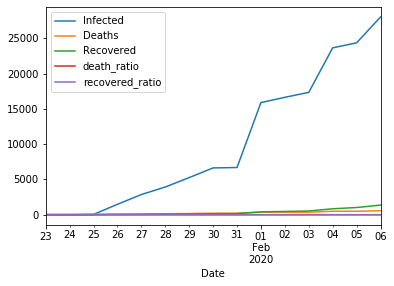

In [94]:
all_sum.set_index('Date').plot()

In [ ]:
cv_data_china